# Group: G-1-9
## Praphull Anand (2019CH04578)
## Rajeev Kumar Mishra (2019CH04524)
## K JAYAPRAKASH REDDY (2019CH04522)
## Sachin Sahni (2019CH04529)
## SHIVANGI TYAGI (2019CH04545)

#IDS Assignment 2 - Option 2

Tasks to be performed
Focus on applying the learnt data analytics concepts and try to share your findings on following aspects:
* What are the highest paid Skills in the US market?
* What are the job categories, which involve above mentioned niche skills?
* Applying clustering concepts, please depict visually what are the different salary ranges basednon job category and years of experience.

1. DataPreparation[10marks]
* Schemamustbenormalized;
* Field types must be appropriate as per fields available. Proper data model
2. IdentificationofVariables[10marks] 3. VariableSelection[10marks]
4. FeatureEngineering[10marks]
5. Missingvalueordata[10marks]
6. Analysis[50marks]

##Step1: Reading the file into a dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import csv

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np


In [ ]:
#### Reading the input file:
dataframe = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IDS/A6/data.csv")

## 2. IdentificationofVariables[10marks]
### 2.1: Variable descriptions


<b> Job ID:</b> The Unique Job ID for each opening     
<b> Agency:</b>Deparntment of the Jobs description      
<b>Posting Type:</b> The opening type, whether internal or external, for the job.     
<b>'# of Positions:</b> The number of positions available for a certain opening     
<b>Business Title:</b> The position the candidate would hold.     
<b>Civil Service Title:</b> The Broad Title the position would be classified under     
<b>Title Code No:</b> The Code for a particular title     
<b>Level:</b> The authority the certain opening would bring with it     
<b>Job Category:</b> Broad Classification of where all the jobs would fall in     
<b>Full-time/Part-Time:</b> Time frame of a job.     
<b>Salary Range From:</b> The beginning salary cap for that particular opening     
<b>Salary Range To:</b> The highest cap for that particular job opening.     
<b>Salary Frequency:</b> The payment factor for the job, hourly or annual     
<b>Work Location:</b> The location of the workplace     
<b>Division/Work Unit:</b> Broad working units for all the jobs     
<b>Job Description:</b> A brief idea of what the job will contain     
<b>Minimum Qual Requirements:</b> The minimum qualifications a candidate must possess for the job     
<b>Preferred Skills:</b> Optimal skills which the posting is looking for     
<b>Additional Information:</b> Any additional information provided with the job opening     
<b>Hours/Shift:</b> The timings for the job     
<b>Work Location 1:</b> Additional information for the work location     
<b>Recruitment Contact:</b> Empty field, supposed to contain numbers     
<b>Residency Requirement:</b> Whether the employee must be a resident of NYC.     
<b>Posting date:</b> When the opening was announced.          
<b>Post Until:</b> The closing date.     
<b>Posting Updated:</b> The time when the posting was updated for the opening.     
<b>Process Date:</b> When the posting process was completed     

In [ ]:
dataframe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         3228 non-null   int64  
 1   Agency                         3228 non-null   object 
 2   Posting Type                   3228 non-null   object 
 3   # Of Positions                 3228 non-null   int64  
 4   Business Title                 3228 non-null   object 
 5   Civil Service Title            3228 non-null   object 
 6   Title Code No                  3228 non-null   object 
 7   Level                          3228 non-null   object 
 8   Job Category                   3226 non-null   object 
 9   Full-Time/Part-Time indicator  2941 non-null   object 
 10  Salary Range From              3228 non-null   float64
 11  Salary Range To                3228 non-null   float64
 12  Salary Frequency               3228 non-null   o

In [ ]:
dataframe.head()

Job ID  ...             Process Date
0   87990  ...  2019-08-20T00:00:00.000
1   97899  ...  2019-08-20T00:00:00.000
2  132292  ...  2019-08-20T00:00:00.000
3  132292  ...  2019-08-20T00:00:00.000
4  133921  ...  2019-08-20T00:00:00.000

[5 rows x 28 columns]

##1. DataPreparation[10marks]
### 1.1: Processing date:



In [ ]:
#dataframe['Posting Date'] =  pd.to_datetime(dataframe['Posting Date'], format='%d%b%Y:%H:%M:%S.%f')

date_cols = ['Posting Date', 'Post Until', 'Posting Updated', 'Process Date']

for col in date_cols:
  dataframe[col]= pd.to_datetime(dataframe[col], errors = 'coerce')


### Checking the data types for proper data model:

In [ ]:
dataframe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Job ID                         3228 non-null   int64         
 1   Agency                         3228 non-null   object        
 2   Posting Type                   3228 non-null   object        
 3   # Of Positions                 3228 non-null   int64         
 4   Business Title                 3228 non-null   object        
 5   Civil Service Title            3228 non-null   object        
 6   Title Code No                  3228 non-null   object        
 7   Level                          3228 non-null   object        
 8   Job Category                   3226 non-null   object        
 9   Full-Time/Part-Time indicator  2941 non-null   object        
 10  Salary Range From              3228 non-null   float64       
 11  Salary Range To  

##5. Missing value or data[10marks]

In [ ]:
# Missing Value: 
print ( dataframe.isnull().sum() )

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Code No                       0
Level                               0
Job Category                        2
Full-Time/Part-Time indicator     287
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          14
Preferred Skills                  424
Additional Information           1278
To Apply                            1
Hours/Shift                      2173
Work Location 1                  1744
Recruitment Contact              3228
Residency Requirement               0
Posting Date                        0
Post Until                       2244
Posting Upda

### Null Values are there in below columns:
* Job Category                        2
* Full-Time/Part-Time indicator     287
* Minimum Qual Requirements          14
* Preferred Skills                  424
* Additional Information           1278
* To Apply                            1
* Hours/Shift                      2173
* Work Location 1                  1744
* Recruitment Contact              3228
* Post Until                       2244

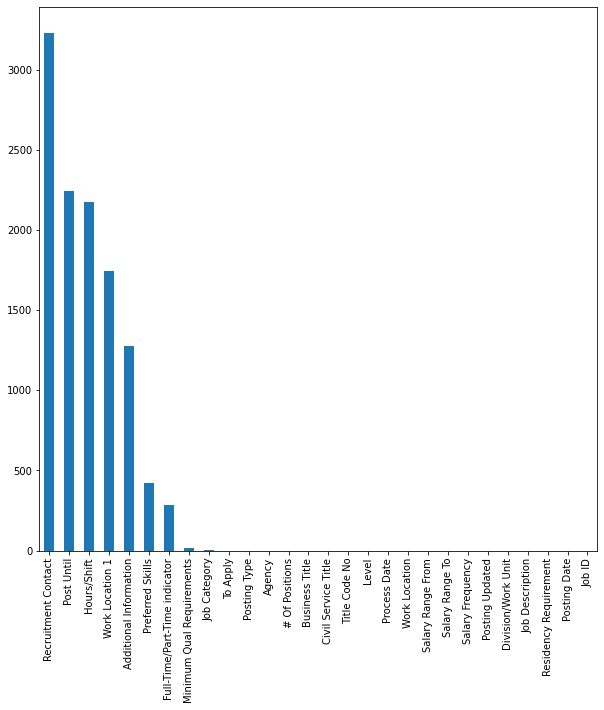

In [ ]:
## Series: data to be plotted.
import matplotlib.pyplot as plt 
fig= plt.figure(figsize=(10,10))
null_value_count = dataframe.isnull().sum()
null_value_count = null_value_count.sort_values(ascending=False)

null_value_count.plot.bar()
plt.show()

#3. VariableSelection[10marks]

<B>Remove the features that are not needed in our analysis:</B>
As from the above graph columns
* Recruitment Contact: Has all the values NULL so remove.
* Hourly/Shift, 
* Post Until, 
* Work Location 1 

Having missing value more than 40%, there fore we will drop those columns and not consider for further calculation.

### Drop Features based on analysis:

In [ ]:
dataframe.drop('Recruitment Contact',axis='columns',inplace=True)
dataframe.drop('Hours/Shift',axis='columns',inplace=True)
dataframe.drop('Work Location 1',axis='columns',inplace=True)
dataframe.drop('Post Until',axis='columns',inplace=True)

## 2.2 IdentificationofVariables[10marks]
### Table Field Info & Type

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Job ID                         3228 non-null   int64         
 1   Agency                         3228 non-null   object        
 2   Posting Type                   3228 non-null   object        
 3   # Of Positions                 3228 non-null   int64         
 4   Business Title                 3228 non-null   object        
 5   Civil Service Title            3228 non-null   object        
 6   Title Code No                  3228 non-null   object        
 7   Level                          3228 non-null   object        
 8   Job Category                   3226 non-null   object        
 9   Full-Time/Part-Time indicator  2941 non-null   object        
 10  Salary Range From              3228 non-null   float64       
 11  Salary Range To  

##1. DataPreparation[10marks]
  * Schemamustbenormalized;
  * field types must be appropriate as per fields available. Proper data model

### 1.1: Duplicate Data Check 

In [ ]:
# Duplicate data Check
#dataframe[dataframe.duplicated() == True]
duplicate = dataframe[dataframe.duplicated()] 
print( duplicate )

      Job ID                          Agency  ... Posting Updated  Process Date
101   242877                  LAW DEPARTMENT  ...      2016-07-21    2019-08-20
106   243565    DEPARTMENT OF TRANSPORTATION  ...      2016-06-22    2019-08-20
163   268307   DEPT OF HEALTH/MENTAL HYGIENE  ...      2016-10-21    2019-08-20
201   276892    DEPARTMENT OF TRANSPORTATION  ...      2017-01-03    2019-08-20
235   282117               POLICE DEPARTMENT  ...      2017-11-30    2019-08-20
248   284447    DEPARTMENT OF TRANSPORTATION  ...      2017-03-14    2019-08-20
880   376356                  LAW DEPARTMENT  ...      2018-12-28    2019-08-20
1281  386158      DEPT OF PARKS & RECREATION  ...      2019-08-08    2019-08-20
1314  387033        DEPARTMENT OF CORRECTION  ...      2019-03-15    2019-08-20
1318  387068      DEPT OF PARKS & RECREATION  ...      2019-08-08    2019-08-20
1396  388113     DEPARTMENT OF CITY PLANNING  ...      2019-04-17    2019-08-20
1466  389713                  LAW DEPART

### 35 ROWS are duplicate so remove the duplicate rows.

In [ ]:
# dropping duplicate values 3228 delete 35
dataframe.drop_duplicates(keep='first',inplace=True) 

print( dataframe )

      Job ID                          Agency  ... Posting Updated  Process Date
0      87990    DEPARTMENT OF BUSINESS SERV.  ...      2011-06-24    2019-08-20
1      97899    DEPARTMENT OF BUSINESS SERV.  ...      2012-01-26    2019-08-20
2     132292           NYC HOUSING AUTHORITY  ...      2013-12-12    2019-08-20
3     132292           NYC HOUSING AUTHORITY  ...      2013-12-12    2019-08-20
4     133921           NYC HOUSING AUTHORITY  ...      2014-01-08    2019-08-20
...      ...                             ...  ...             ...           ...
3223  406952     DEPARTMENT OF CITY PLANNING  ...      2019-08-19    2019-08-20
3224  406971  HOUSING PRESERVATION & DVLPMNT  ...      2019-08-19    2019-08-20
3225  406971  HOUSING PRESERVATION & DVLPMNT  ...      2019-08-19    2019-08-20
3226  406986         HUMAN RIGHTS COMMISSION  ...      2019-08-19    2019-08-20
3227  406986         HUMAN RIGHTS COMMISSION  ...      2019-08-19    2019-08-20

[3193 rows x 24 columns]


## 6. Analysis[50marks]
### 6.1: Analysis: EDA

### Posting Type and Position Count:

              # Of Positions
Posting Type                
External                3557
Internal                4349


Text(0.5, 1.0, 'Posting Type position count')

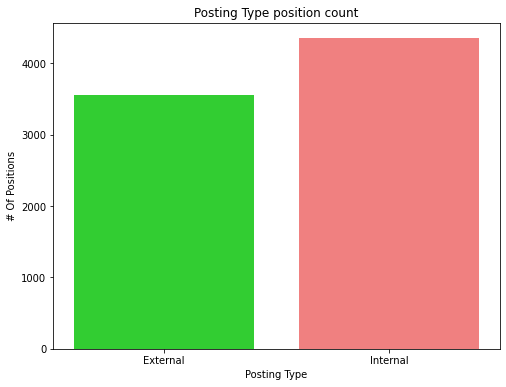

In [ ]:
col_count = dataframe.groupby(['Posting Type']).sum()[['# Of Positions']]
print( col_count )
col_count.reset_index(inplace=True)
rcParams['figure.figsize'] = 8,6
plt.bar(col_count['Posting Type'], col_count['# Of Positions'], color = ['limegreen', 'lightcoral'])
plt.xticks([0, 1])
plt.xlabel('Posting Type')
plt.ylabel('# Of Positions')
plt.title('Posting Type position count')

### Analysis: More jobs are available to City employees only as compared to external postings (available to the general public)

### Full Time or Part time:

In [ ]:
dataframe.loc[dataframe['Full-Time/Part-Time indicator'].isnull(), ['Full-Time/Part-Time indicator']] = 'Unknown'
#print ( dataframe['Full-Time/Part-Time indicator'].isnull().sum() )
col_count = dataframe.groupby(['Full-Time/Part-Time indicator']).count()[['Job ID']]
print( col_count )


                               Job ID
Full-Time/Part-Time indicator        
F                                2744
P                                 164
Unknown                           285


                               # Of Positions
Full-Time/Part-Time indicator                
F                                        6568
P                                         758
Unknown                                   580


Text(0.5, 1.0, 'Posting Type position count')

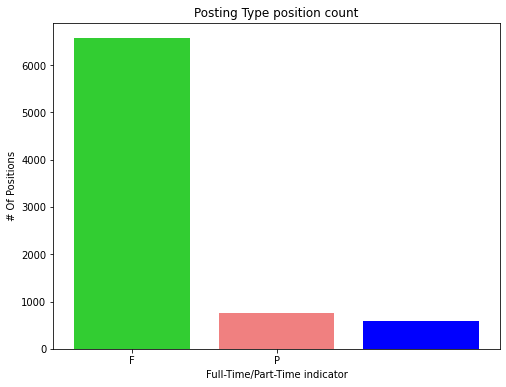

In [ ]:
col_count = dataframe.groupby(['Full-Time/Part-Time indicator']).sum()[['# Of Positions']]
print( col_count )
col_count.reset_index(inplace=True)
rcParams['figure.figsize'] = 8,6
plt.bar(col_count['Full-Time/Part-Time indicator'], col_count['# Of Positions'], color = ['limegreen', 'lightcoral', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Full-Time/Part-Time indicator')
plt.ylabel('# Of Positions')
plt.title('Posting Type position count')


### Analysis: Most of the jobs are full time.

###Posting Type >> Fulltime, parttime positions count.:

No handles with labels found to put in legend.


                                            # Of Positions
Posting Type Full-Time/Part-Time indicator                
External     F                                        2914
             P                                         379
             Unknown                                   264
Internal     F                                        3654
             P                                         379
             Unknown                                   316


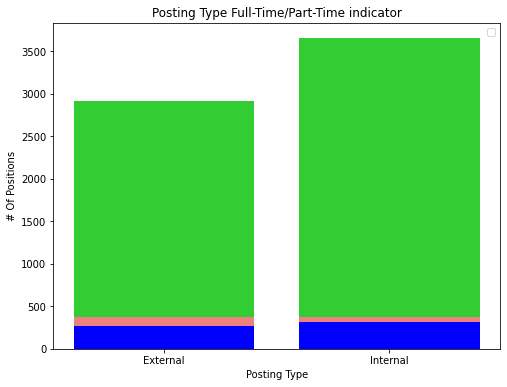

In [ ]:
col_count = dataframe.groupby(['Posting Type', 'Full-Time/Part-Time indicator']).sum()[['# Of Positions']]
print( col_count )
#col_count.columns

col_count.reset_index(inplace=True)
#col_count

rcParams['figure.figsize'] = 8,6
plt.bar(col_count['Posting Type'], col_count['# Of Positions'], color = ['limegreen', 'lightcoral', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Posting Type')
plt.ylabel('# Of Positions')
plt.title('Posting Type Full-Time/Part-Time indicator')
plt.legend()


### # of Positions as per Job Category:

In [ ]:
# Count jobs category wise:
print( 'Count of unique Job Category: ', len( dataframe['Job Category'].unique() ) )

#col_count = dataframe.groupby(['Job Category']).count()[['Job ID']]
col_count = dataframe.groupby(['Job Category']).sum()[['# Of Positions']]
col_count.reset_index(inplace=True)
col_count = col_count.sort_values(by='# Of Positions', ignore_index=True, ascending=False)

col_count


Count of unique Job Category:  131


Job Category  # Of Positions
0                    Building Operations & Maintenance            1106
1            Public Safety, Inspections, & Enforcement            1049
2                Engineering, Architecture, & Planning             842
3                                        Legal Affairs             728
4                                               Health             683
..                                                 ...             ...
125  Administration & Human Resources Constituent S...               1
126  Clerical & Administrative Support Community & ...               1
127  Communications & Intergovernmental Affairs Fin...               1
128  Administration & Human Resources Finance, Acco...               1
129  Finance, Accounting, & Procurement Information...               1

[130 rows x 2 columns]

No handles with labels found to put in legend.


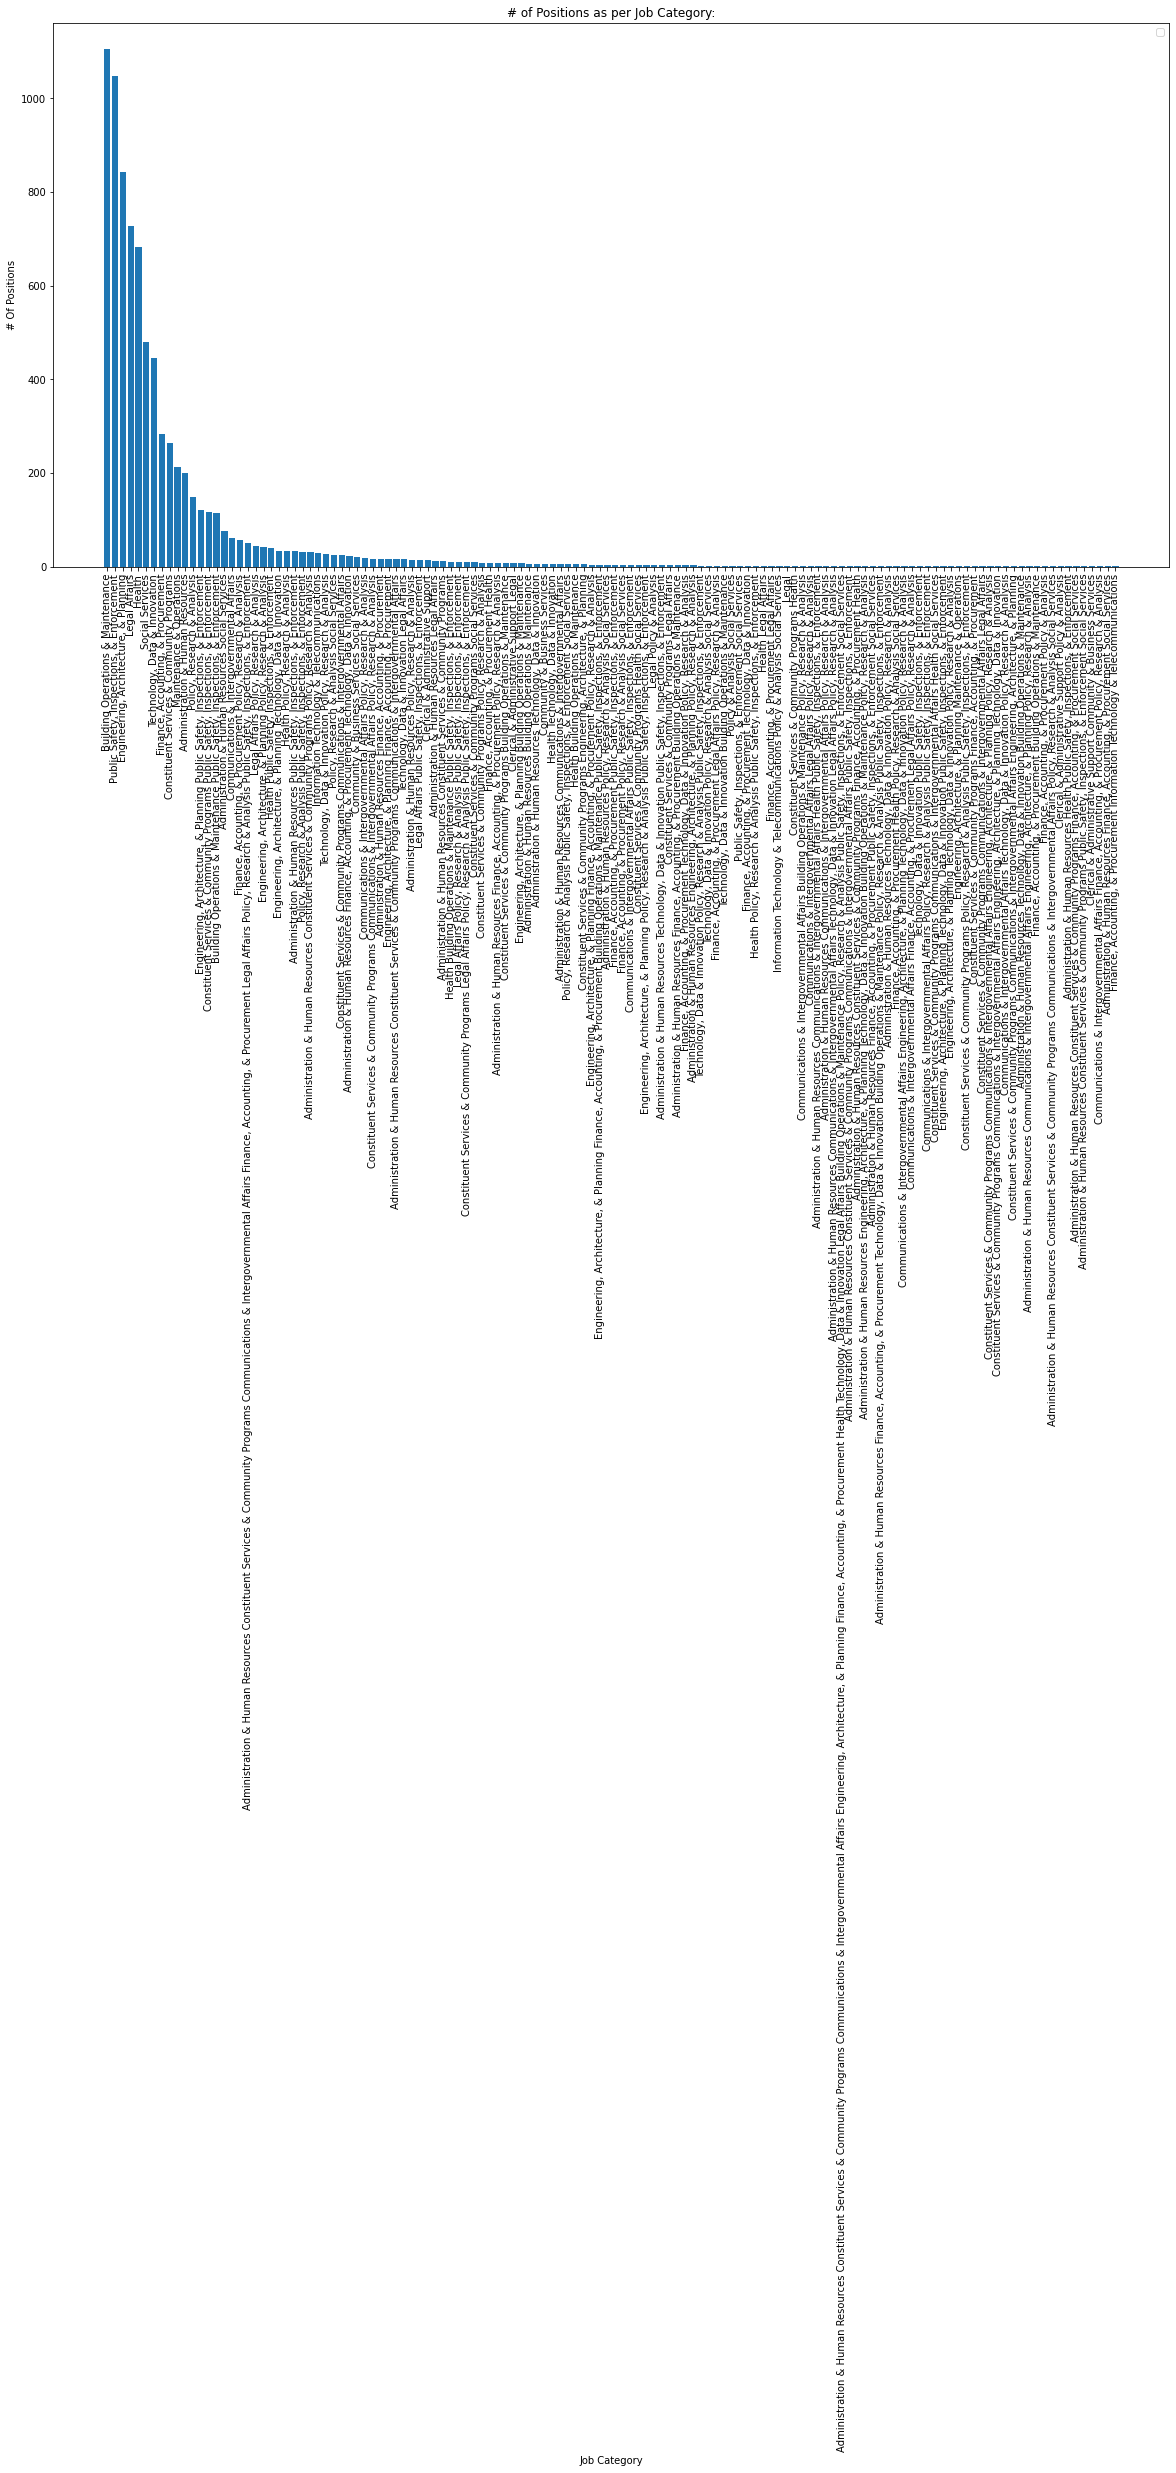

In [ ]:
rcParams['figure.figsize'] = 20,10
plt.bar(col_count['Job Category'], col_count['# Of Positions'])
#plt.xticks([0, 1])
plt.xlabel('Job Category')
plt.xticks(rotation=90)
plt.ylabel('# Of Positions')
plt.title('# of Positions as per Job Category:')
plt.legend()

### Business Title:

In [ ]:
# Count Business Title wise:
print( 'Count of unique Business Title Positions: ', len( dataframe['Business Title'].unique() ) )
col_count = dataframe.groupby(['Business Title']).sum()[['# Of Positions']]
col_count.reset_index(inplace=True)
col_count = col_count.sort_values(by='# Of Positions', ignore_index=True, ascending=False)

col_count

Count of unique Business Title Positions:  1326


Business Title  # Of Positions
0                         ASSISTANT CORPORATION COUNSEL             336
1                          Youth Development Specialist             300
2                              Parks Enforcement Patrol             200
3                               Sewage Treatment Worker             160
4                             Seasonal City Park Worker             160
...                                                 ...             ...
1321                     Public Safety Facility Manager               1
1322                                 Public Record Aide               1
1323                     Collision Reporting Data Clerk               1
1324  Public Health Advisor, Bureau of Sexually Tran...               1
1325                      Facilities Central Supervisor               1

[1326 rows x 2 columns]

### Civil Service Title


In [ ]:
# Count Civil Service Title wise:
print( 'Count of unique Civil Service Title Positions: ', len( dataframe['Civil Service Title'].unique() ) )
col_count = dataframe.groupby(['Civil Service Title']).sum()[['# Of Positions']]
col_count.reset_index(inplace=True)
col_count = col_count.sort_values(by='# Of Positions', ignore_index=True, ascending=False)

col_count

Count of unique Civil Service Title Positions:  330


Civil Service Title  # Of Positions
0     ASSISTANT CORPORATION COUNSEL             364
1             COMMUNITY COORDINATOR             304
2                 URBAN PARK RANGER             300
3      YOUTH DEVELOPMENT SPECIALIST             300
4                  CITY PARK WORKER             252
..                              ...             ...
325                       SECRETARY               1
326  SUPERVISING COMPUTER SERVICE T               1
327  SUPERVISOR I (SOCIAL SERVICES)               1
328  SUPERVISOR III (SOCIAL SERVICE               1
329    INVESTIGATIVE MANAGER (CCRB)               1

[330 rows x 2 columns]

### TOP Work locations: 
* No. of Positions at particular Work Location:

In [ ]:
# Count Civil Service Title wise:
print( 'Count of Positions @ particular Work Location: ', len( dataframe['Work Location'].unique() ) )
col_count = dataframe.groupby(['Work Location']).sum()[['# Of Positions']]
col_count.reset_index(inplace=True)
col_count = col_count.sort_values(by='# Of Positions', ignore_index=True, ascending=False)

col_count

Count of Positions @ particular Work Location:  238


Work Location  # Of Positions
0                NYC - All Boroughs             828
1              100 Church St., N.Y.             518
2       96-05 Horace Harding Expway             457
3    30-30 Thomson Ave L I City Qns             337
4                    105 St & 5 Ave             329
..                              ...             ...
233              Bronx River Houses               1
234          420 East 26Th St Ny Ny               1
235              198 E 161st Street               1
236                  Gompers Houses               1
237                 16 Court Street               1

[238 rows x 2 columns]

## DataPreparation[10marks]
### 1.2 Check validity of salary range data from - to 

In [ ]:
job_id_list = []
for i, row in dataframe.iterrows():
  job_id = row['Job ID']
  sfrom = row['Salary Range From']
  sto = row['Salary Range To']
  if sfrom > sto :
    job_id_list.append( job_id )

print( 'Job IDs where from range is higher than to', job_id_list )

Job IDs where from range is higher than to []


##1. DataPreparation[10marks]
  * Schema must be normalized;
  * Field types must be appropriate as per fields available. Proper data model

### 1.2 Normalize Salary data range:
*  Make it annually

In [ ]:
# Null Values in below columns:
#Salary Range From                   0
#Salary Range To                     0
#Salary Frequency                    0

dataframe['Salary Frequency'].unique()

array(['Annual', 'Hourly', 'Daily'], dtype=object)

### Need to convert Hourly, and Daily to: Annually
* Asumption: Daily is 8 hrs 
* Working hours in US 
* On average, a full-time employee in United Stats works 1,768 hours per year.


In [ ]:
def annual_salary( stype, amount ):
  if stype == 'Annual':
    return amount
  elif stype == 'Daily':
    return (amount/8)*1768
  elif stype == 'Hourly':
    return amount * 1768
  else:
    return amount



In [ ]:
# dataframe.loc[dataframe['Salary Frequency'] !=  'Annual', ['Salary Range From', 'Salary Range To']] = dataframe.loc[dataframe['Salary Frequency'] !=  'Annual', [ annual_salary(dataframe.loc['Salary Frequency'], dataframe.loc['Salary Range From']), annual_salary(dataframe.loc['Salary Frequency'], dataframe.loc['Salary Range To'])]]

for i, row in dataframe.iterrows():
  if( row['Salary Frequency'] !=  'Annual' ):
    sfreq = row['Salary Frequency']
    sfrom = row['Salary Range From']
    sto = row['Salary Range To']

    dataframe.at[ i, 'Salary Range From'] = annual_salary( sfreq, sfrom )
    dataframe.at[ i, 'Salary Range To'] = annual_salary( sfreq, sto )
    dataframe.at[ i, 'Salary Frequency'] = 'Annual'

dataframe.head()

Job ID                        Agency  ... Posting Updated  Process Date
0   87990  DEPARTMENT OF BUSINESS SERV.  ...      2011-06-24    2019-08-20
1   97899  DEPARTMENT OF BUSINESS SERV.  ...      2012-01-26    2019-08-20
2  132292         NYC HOUSING AUTHORITY  ...      2013-12-12    2019-08-20
3  132292         NYC HOUSING AUTHORITY  ...      2013-12-12    2019-08-20
4  133921         NYC HOUSING AUTHORITY  ...      2014-01-08    2019-08-20

[5 rows x 24 columns]

## Cont... EDA:
### Salary Range for each Job Category

In [ ]:
sal_range = dataframe.groupby('Job Category').agg({'Salary Range From': ['min'], 'Salary Range To': ['max']}).reset_index()

sal_range = sal_range.sort_values(by=[('Salary Range To', 'max')], ignore_index=True, ascending=False)
#sal_range.columns
sal_range

Job Category  ... Salary Range To
                                                        ...             max
0                    Building Operations & Maintenance  ...        234402.0
1    Legal Affairs Public Safety, Inspections, & En...  ...        234402.0
2                                               Health  ...        230000.0
3    Communications & Intergovernmental Affairs Leg...  ...        225217.0
4                   Health Policy, Research & Analysis  ...        225217.0
..                                                 ...  ...             ...
125           Health Building Operations & Maintenance  ...         44974.0
126                                              Legal  ...         40495.0
127  Administration & Human Resources Constituent S...  ...         35183.2
128  Administration & Human Resources Communication...  ...         30940.0
129  Administration & Human Resources Finance, Acco...  ...         28288.0

[130 rows x 3 columns]

# 4. FeatureEngineering[10marks]

###4.1: Prefered Skills

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud ,STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer
from gensim.models import word2vec
import nltk 
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [ ]:
print ( 'From Total: 3228/', dataframe['Preferred Skills'].isnull().sum(), ' are null values' )

From Total: 3228/ 420  are null values


##1. DataPreparation[10marks]
### 1.3 Data Cleaning in Preferd Skills

In [ ]:
### Add a new Column to Data Frame: Copy the Preferred Skills column into skill
dataframe['skills']=dataframe['Preferred Skills'].copy()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
description_list=[]
stop_words = set(stopwords.words("english"))
from tqdm import *
for description in tqdm(dataframe.skills):
    description=str(description)
    description = description.lower()
    description = re.sub('[^a-zA-z\s]', '', description)
    description = re.sub('\s+', ' ', description) 
    tokens = nltk.word_tokenize(description)
    description = [i for i in tokens if not i in stop_words]
    lemma = WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    description =" ".join(description)
    description_list.append(description)

dataframe['skills']=description_list

100%|██████████| 3193/3193 [00:03<00:00, 1035.20it/s]


In [ ]:
vectorizer = CountVectorizer(ngram_range = (2,2),max_features=30,stop_words="english") 
descriptionMatrix = vectorizer.fit_transform(description_list).toarray()
dictionary = vectorizer.vocabulary_.items()  

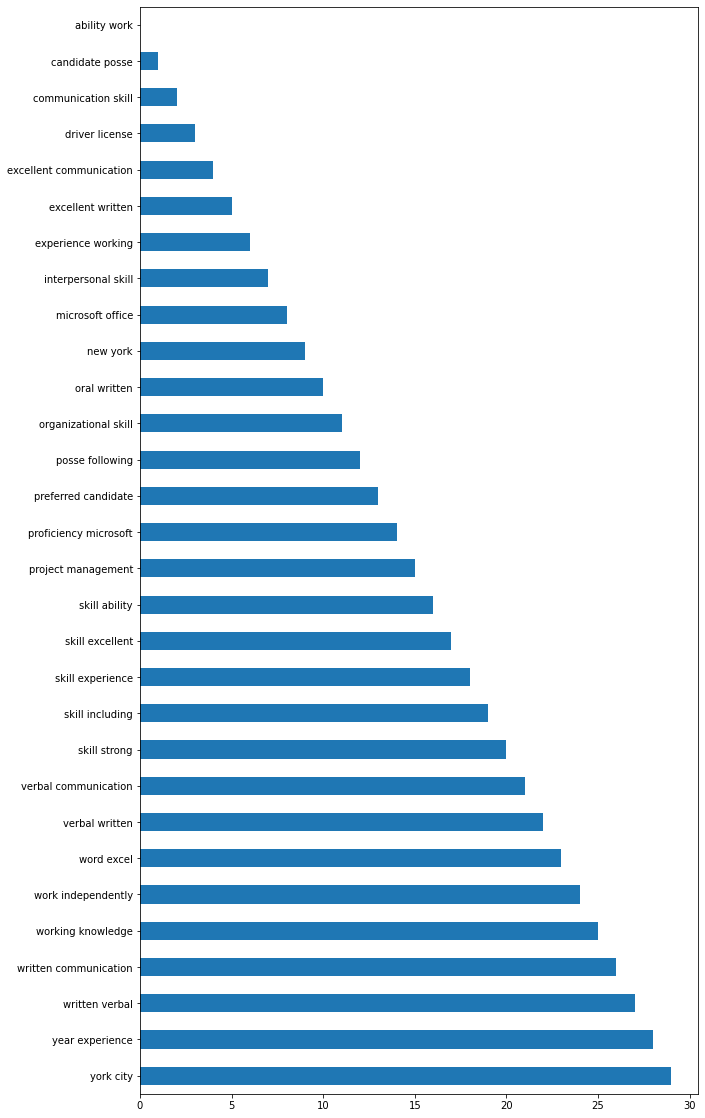

In [ ]:
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)
top_vacab = vocab_bef_stem.head(50)
top_vacab.plot(kind = 'barh', figsize=(10,20))

###4.2: Feature engineering on the Minimum Qual Requirements and pre-process it

In [ ]:
dataframe['minimumRequirement']=dataframe['Minimum Qual Requirements'].copy()

In [ ]:
requirement_list=[]
stop_words = set(stopwords.words("english"))
from tqdm import *
for description in tqdm(dataframe.minimumRequirement):
    description=str(description)
    description = description.lower()
    description = re.sub('[^a-zA-z\s]', '', description)
    description = re.sub('\s+', ' ', description) 
    tokens = nltk.word_tokenize(description)
    description = [i for i in tokens if not i in stop_words]
    lemma = WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    description =" ".join(description)
    requirement_list.append(description)

dataframe['minimumRequirement']=requirement_list

100%|██████████| 3193/3193 [00:03<00:00, 1030.86it/s]


In [ ]:
print( dataframe['minimumRequirement'] )

0       baccalaureate degree accredited college two ye...
1       baccalaureate degree accredited college univer...
2       three year fulltime satisfactory experience me...
3       three year fulltime satisfactory experience me...
4       five year fulltime satisfactory experience pai...
                              ...                        
3223    baccalaureate degree accredited college univer...
3224    baccalaureate degree accredited college univer...
3225    baccalaureate degree accredited college univer...
3226    graduation accredited united state law school ...
3227    graduation accredited united state law school ...
Name: minimumRequirement, Length: 3193, dtype: object


### 1.4 Extract year of experience from the minimumRequirement

In [ ]:
### Process year of experience from the minimumRequirement:
dataframe['yearExperience']=dataframe['minimumRequirement'].str.extract(r'(\w+)\syear.+experience')
dataframe['yearExperience'].value_counts()


one           750
two           651
four          540
three         320
five          298
six           182
onehalf        24
eight          14
seven          10
ten             7
equivalent      4
science         4
nurse           2
minimum         2
college         2
Name: yearExperience, dtype: int64

### Converting String to Int for Year of Exp.

In [ ]:
year={
        'onehalf':2,
        'one' : 1,
        'least' : 1,
        'college' :1,
        'minimum':1,
        'science':1,
        'nurse':1,
        'two' : 2,
        'three':3,
        'four':4,
        'five':5,
        'six':6,
        'eight':8,
        'seven':7,
        'ten':10,    
}
dataframe['yearExperienceNumber'] = dataframe['yearExperience'].map(year)
dataframe['yearExperienceNumber'].value_counts()

1.0     760
2.0     675
4.0     540
3.0     320
5.0     298
6.0     182
8.0      14
7.0      10
10.0      7
Name: yearExperienceNumber, dtype: int64

### Job Category

In [ ]:
# helper functions
def wordCloudData(text):
    wordcloud = WordCloud(background_color='white',
                     width=1024, height=720).generate(text)
    plt.clf()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

def jobCategoryParse(x):
    l = x.replace('&', ',').split(',')
    l = [x.strip().rstrip(',') for x in l]
    jobMainCategories.extend(l)

def parsekeywords(x, l):
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    stop_words = set(stopwords.words('english'))
    token_l = [w for w in tokens if not w in stop_words and w.isalpha()]
    l.extend(token_l)
    
def skillsvsCategories(x):
    kwl = []
    dataframe[dataframe['Job Category']==x].skillsvsCategories.dropna().apply(parsekeywords, l=kwl)
    kwl = pd.Series(kwl)
    return kwl.value_counts()[:20]

## Popular Job Category:

In [ ]:
jobMainCategories = []
dataframe['Job Category'].dropna().apply(jobCategoryParse)
jobMainCategories = pd.Series(jobMainCategories)
jobMainCategories = jobMainCategories[jobMainCategories!='']

jobMainCategoriesPopular = jobMainCategories.value_counts().iloc[:25]
# Popular Job Categories:
jobMainCategoriesPopular

Architecture              739
Engineering               718
Planning                  525
Data                      467
Inspections               458
Enforcement               450
Research                  434
Innovation                409
Technology                395
Analysis                  366
Administration            291
Accounting                284
Constituent Services      274
Maintenance               250
Building Operations       236
Finance                   218
Legal Affairs             205
Public Safety             203
Community Programs        196
Health                    174
Procurement               173
Policy                    154
Human Resources           144
Planning Public Safety     96
Social Services            85
dtype: int64

### Additional EDA Analysis to see the data relationship

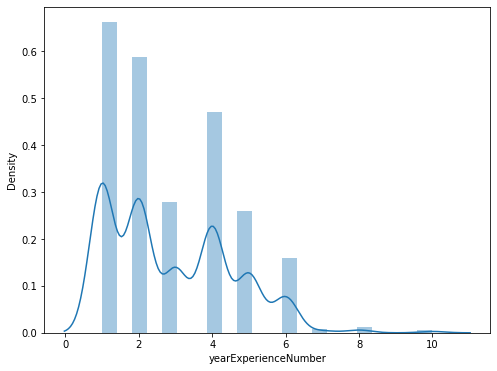

In [ ]:
sns.distplot(dataframe['yearExperienceNumber'].dropna())

### Experience Trend: Starting salary from years of experiance.

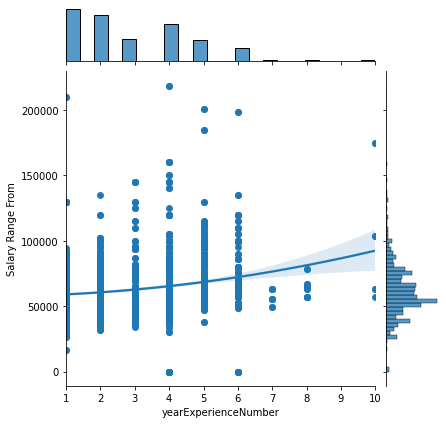

In [ ]:
#Starting salary from years of experiance.
g = sns.JointGrid(x='yearExperienceNumber', y='Salary Range From', data=dataframe[['yearExperienceNumber','Salary Range From']])
g.plot(sns.scatterplot, sns.histplot)
g.plot_joint(sns.regplot, order=2) 


### Top Job Categories

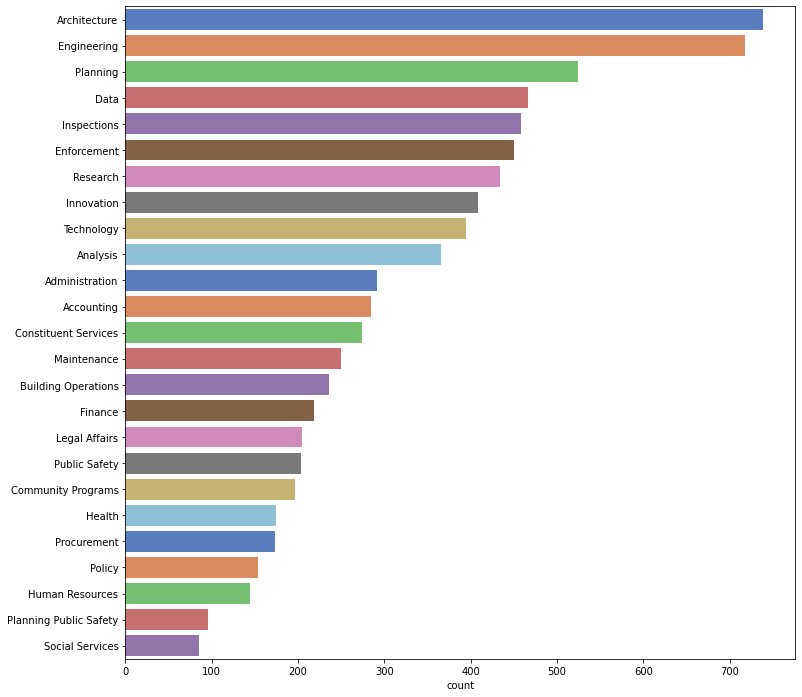

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(y=jobMainCategories, order=jobMainCategoriesPopular.index, palette="muted")

#6. Analysis – 50 marks

### What are the highest paid Skills in the US market?

In [ ]:
skillvsSalaries = dataframe[['skills', 'Salary Range From', 'Salary Range To','Job Category']]
skillvsSalaries.columns=['skills','minSalary','maxSalary','jobCategory']

In [ ]:
top10MaxSalaryWithSkills=pd.DataFrame(skillvsSalaries.groupby(['skills'])['maxSalary'].mean().nlargest(10)).reset_index()

In [ ]:
top10MaxSalaryWithSkills

skills  maxSalary
0  excellent analytical legal writing negotiation...   234402.0
1  executive deputy commissioner excellent manage...   230000.0
2  minimum five year experience public health inc...   225217.0
3  minimum seven year experience public health in...   225217.0
4  qualification least five year experience manag...   225217.0
5  ten year businessindustry experience public pe...   225217.0
6  valid holder cciso certified chief information...   225217.0
7  key competency leadership capacity building pr...   224749.0
8  master degree accounting related field five ye...   224749.0
9  minimum ten year fulltime satisfactory profess...   224749.0

### Top 10 Highest Paid Skills in US (using Count Vectorizer)

In [ ]:
vectorizer = CountVectorizer(ngram_range = (3,3),max_features=60,stop_words="english") 
descriptionMatrix = vectorizer.fit_transform(top10MaxSalaryWithSkills['skills'].tolist()).toarray()
dictionary = vectorizer.vocabulary_.items()  

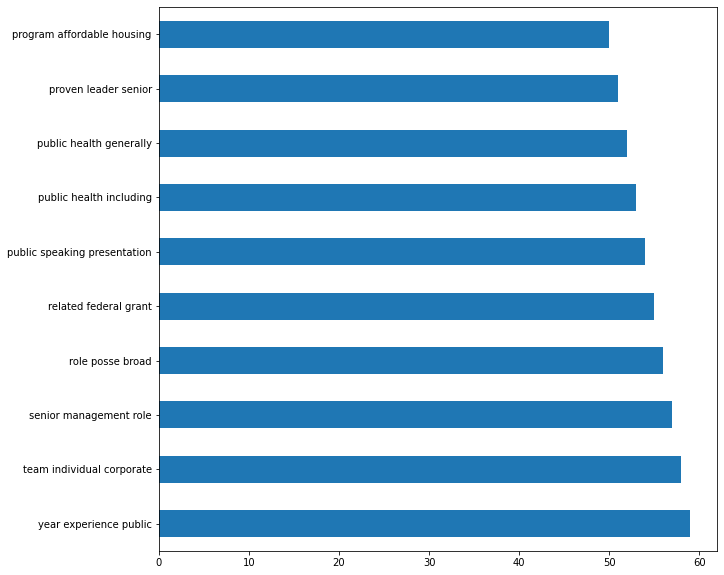

In [ ]:
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)
top_vacab = vocab_bef_stem.head(10)
ax = top_vacab.plot(kind = 'barh', figsize=(10,10))  # s is an instance of Series
fig = ax.get_figure()
fig.savefig('analysisa.png')

###The top 10 Highest Paid Skills in US are

In [ ]:
print("The top 10 Highest Paid Skills in US are","\n")
print(top_vacab)

The top 10 Highest Paid Skills in US are 

year experience public          59
team individual corporate       58
senior management role          57
role posse broad                56
related federal grant           55
public speaking presentation    54
public health including         53
public health generally         52
proven leader senior            51
program affordable housing      50
dtype: int64


### What are the job categories, which involve above mentioned niche skills?

In [ ]:
top10JobCategories=skillvsSalaries['jobCategory'].dropna().tolist()

complete10JobCategories=[]
for value in top10JobCategories:
    tempList=value.split(',')
    complete10JobCategories.append("".join(tempList))

values, counts = np.unique(complete10JobCategories, return_counts=True)

top10JobsCategoriesDF=pd.DataFrame({'jobCategories':values, 'count':counts})

top10JobsCategoriesDF=top10JobsCategoriesDF.sort_values(['count'],ascending=False)
top10JobsCategoriesDF=top10JobsCategoriesDF.reset_index(drop=True)

print("The Top 10 Job Categories")
top10JobsCategoriesDF=top10JobsCategoriesDF[0:10]
top10JobsCategoriesDF


The Top 10 Job Categories


jobCategories  count
0        Engineering Architecture & Planning    518
1               Technology Data & Innovation    359
2          Building Operations & Maintenance    213
3                              Legal Affairs    205
4    Public Safety Inspections & Enforcement    201
5  Constituent Services & Community Programs    187
6                                     Health    174
7           Administration & Human Resources    144
8           Finance Accounting & Procurement    141
9                 Policy Research & Analysis    124

Text(0.5, 1.0, 'Top 10 Job Catgories in US with Highest Paid Skills')

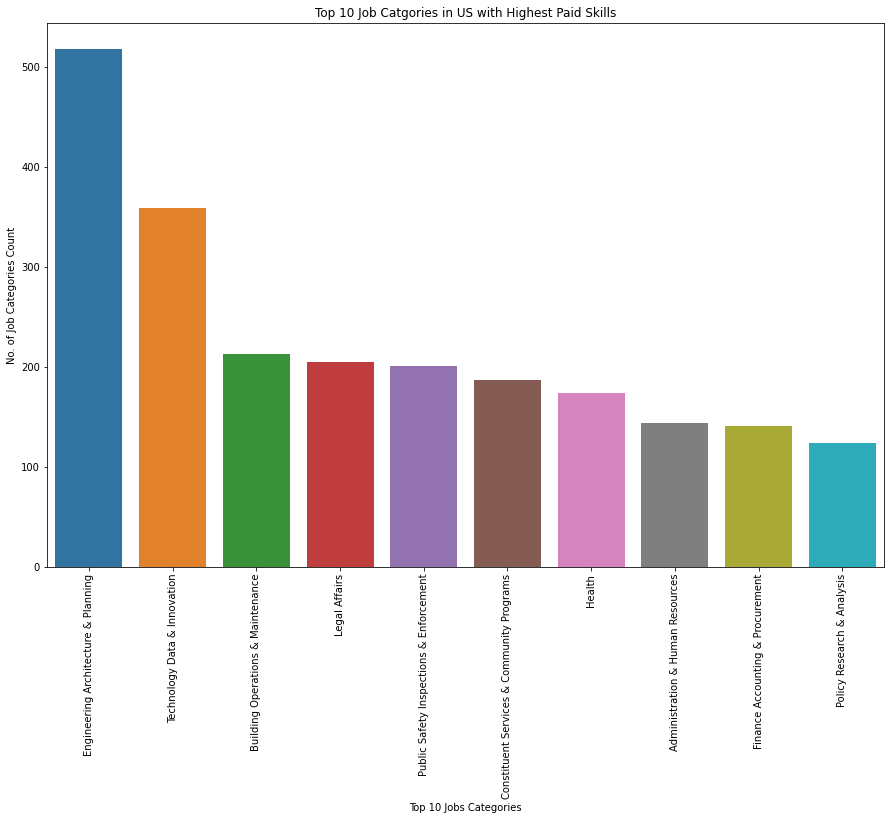

In [ ]:
plt.figure(figsize = (15,10))
ax = sns.barplot(x = top10JobsCategoriesDF["jobCategories"],y = top10JobsCategoriesDF["count"])
plt.xticks(rotation = 90)
plt.xlabel("Top 10 Jobs Categories")
plt.ylabel("No. of Job Categories Count")
plt.title("Top 10 Job Catgories in US with Highest Paid Skills")

##Applying clustering concepts, please depict visually what are the different salary ranges based on job category and years of experience.

### Job Category, Year of exp., Salary Range: Grouping.

In [ ]:
job_exp_sal_range = dataframe.groupby(['Job Category', 'yearExperienceNumber']).agg({'Salary Range From': ['min'], 'Salary Range To': ['max']}).reset_index()

job_exp_sal_range = job_exp_sal_range.sort_values(by=[('Job Category',''),('yearExperienceNumber', ''), ('Salary Range To', 'max')], ignore_index=True, ascending=False)
#job_exp_sal_range.columns
job_exp_sal_range

Job Category  ... Salary Range To
                                                        ...             max
0    Technology, Data & Innovation Public Safety, I...  ...        140000.0
1    Technology, Data & Innovation Policy, Research...  ...         97873.0
2    Technology, Data & Innovation Policy, Research...  ...         70000.0
3    Technology, Data & Innovation Policy, Research...  ...        120000.0
4    Technology, Data & Innovation Policy, Research...  ...         64662.0
..                                                 ...  ...             ...
271                   Administration & Human Resources  ...        217244.0
272                   Administration & Human Resources  ...        178873.0
273                   Administration & Human Resources  ...         93900.0
274                   Administration & Human Resources  ...        150000.0
275                   Administration & Human Resources  ...         97873.0

[276 rows x 4 columns]

### Highest Paid Job Category:

In [ ]:
job_exp_sal_range = job_exp_sal_range.sort_values(by=[ ('Salary Range To', 'max'), ('Job Category',''),('yearExperienceNumber', '')], ignore_index=True, ascending=False)
job_exp_sal_range

Job Category  ... Salary Range To
                                                        ...             max
0    Legal Affairs Public Safety, Inspections, & En...  ...     234402.0000
1                    Building Operations & Maintenance  ...     234402.0000
2                                               Health  ...     230000.0000
3                        Technology, Data & Innovation  ...     225217.0000
4                   Health Policy, Research & Analysis  ...     225217.0000
..                                                 ...  ...             ...
271           Health Building Operations & Maintenance  ...      44974.0000
272  Constituent Services & Community Programs Heal...  ...      42255.2000
273  Engineering, Architecture, & Planning Policy, ...  ...      41416.8144
274  Administration & Human Resources Constituent S...  ...      40629.0000
275  Administration & Human Resources Public Safety...  ...      38896.0000

[276 rows x 4 columns]

In [ ]:
## Group Data

clusterGroupDataSet = dataframe.groupby( ['Job Category', 'yearExperienceNumber', 'Salary Range To'] ).size().reset_index()

clusterGroupDataSet.columns = ['Job Category', 'yearExperienceNumber', 'Salary Range To', 'Frequency']
clusterGroupDataSet

Job Category  ...  Frequency
0                      Administration & Human Resources  ...          1
1                      Administration & Human Resources  ...          3
2                      Administration & Human Resources  ...          4
3                      Administration & Human Resources  ...          1
4                      Administration & Human Resources  ...          2
...                                                 ...  ...        ...
1082  Technology, Data & Innovation Policy, Research...  ...          2
1083  Technology, Data & Innovation Policy, Research...  ...          2
1084  Technology, Data & Innovation Policy, Research...  ...          2
1085  Technology, Data & Innovation Policy, Research...  ...          2
1086  Technology, Data & Innovation Public Safety, I...  ...          2

[1087 rows x 4 columns]

In [ ]:
import plotly.graph_objs as go

f = go.FigureWidget( 
    go.Scatter(x=clusterGroupDataSet['Salary Range To'], y=clusterGroupDataSet['Frequency'], mode='markers',
                marker_color=clusterGroupDataSet['yearExperienceNumber'],marker=dict(colorscale='Viridis',
                                                                                     size=clusterGroupDataSet['yearExperienceNumber']*5,sizemode='area',
                                                                                     sizeref=2*max(clusterGroupDataSet['yearExperienceNumber']*5)/(40.**2),sizemin=1,showscale=True),
     text='Job Category: ' + clusterGroupDataSet['Job Category'] + '\r\n' + 'Experience: ' + clusterGroupDataSet['yearExperienceNumber'].astype(str)))

f.update_layout(
    xaxis=dict(
        title='Salary Range',
        gridcolor='black',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Frequency',
        gridcolor='black',
        gridwidth=2,
    ),
    paper_bgcolor='lightgrey',
    plot_bgcolor='lightgrey'
)

f.layout.title = 'Salary Range Vs Job Categories Vs Experience'
f.show()


In [ ]:
job_exp = dataframe.groupby(['Job Category', 'yearExperienceNumber']).count()[['Job ID']]


#job_exp = job_exp.sort_values(by=[('Job Category',''),('yearExperienceNumber', '')], ignore_index=True, ascending=False)
#job_exp_sal_range.columns
print(job_exp)

                                                                         Job ID
Job Category                                       yearExperienceNumber        
Administration & Human Resources                   1.0                       27
                                                   2.0                       23
                                                   3.0                       37
                                                   4.0                       16
                                                   5.0                        9
...                                                                         ...
Technology, Data & Innovation Policy, Research ... 3.0                        4
                                                   6.0                        2
Technology, Data & Innovation Policy, Research ... 1.0                        2
Technology, Data & Innovation Policy, Research ... 2.0                        2
Technology, Data & Innovation Public Saf

### Applying Clustering:

In [ ]:
values = dataframe['Job Category'].unique()
values.size

131

In [ ]:
dataframe.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Residency Requirement',
       'Posting Date', 'Posting Updated', 'Process Date', 'skills',
       'minimumRequirement', 'yearExperience', 'yearExperienceNumber'],
      dtype='object')

In [ ]:
clusterDataSet=dataframe[['Salary Range From','Salary Range To','yearExperienceNumber',"Job Category"]]
clusterDataSet.columns=['minSalary','maxSalary','experience','jobCategory']

In [ ]:
clusterDataSet=clusterDataSet.dropna()
clusterDataSet=clusterDataSet.reset_index(drop=True)

In [ ]:
import plotly.express as px
tips = clusterDataSet
fig = px.histogram(tips, x="maxSalary")
fig.show()

##DBSCAN 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
clusterDataSetDBSCAN = pd.get_dummies(clusterDataSet)

db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(clusterDataSetDBSCAN)
clusterDataSet['DBScanLbl'] = list(db_default.labels_)
print('The DBSCAN Clustering labels are \n')
print(np.unique(db_default.labels_))

The DBSCAN Clustering labels are 

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199]


In [ ]:
def getPCAattr(dfx,dfy):
  x = dfx.values
  PrinComp = pca.fit_transform(x)
  Yvar = list(dfy.columns)
  PrincDF = pd.DataFrame(data = PrinComp , columns = ['pcol1','pcol2'])
  PCADF = pd.concat([PrincDF, dfy], axis = 1)
  fig = plt.figure(figsize = (12,12))
  pcp = fig.add_subplot(1,1,1) 
  pcp.set_xlabel('Principal Component 1', fontsize = 15)
  pcp.set_ylabel('Principal Component 2', fontsize = 15)
  plt.grid( linestyle='-', linewidth=1)
  pcp.set_title('2 component PCA', fontsize = 20)
  loanstat =  list(np.unique(dfy.values))
  existingcolors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
  colors = []
  for i in range(len(loanstat)):
    colors.append(existingcolors[i])
  for target, color in zip(loanstat,colors):
      indicesToKeep = PCADF[Yvar[0]] == target
      pcp.scatter(PCADF.loc[indicesToKeep, 'pcol1'], PCADF.loc[indicesToKeep, 'pcol2'], c = color, s = 50)
      pcp.legend(loanstat)
      pcp.grid()
  return PCADF

## Birch Clustering

pcol1         pcol2  Label
0    -39673.976410   3687.258907      2
1    -39673.976410   3687.258907      2
2    -29206.840494  10257.765766      2
3    -29206.840494  10257.765766      2
4    -11840.379023  -8786.326870      2
...            ...           ...    ...
2799  23908.603406 -16118.513707      1
2800 -14756.229359  -2442.530707      2
2801 -14756.229359  -2442.530707      2
2802  -3807.947689  11563.851005      1
2803           NaN           NaN      1

[2804 rows x 3 columns]

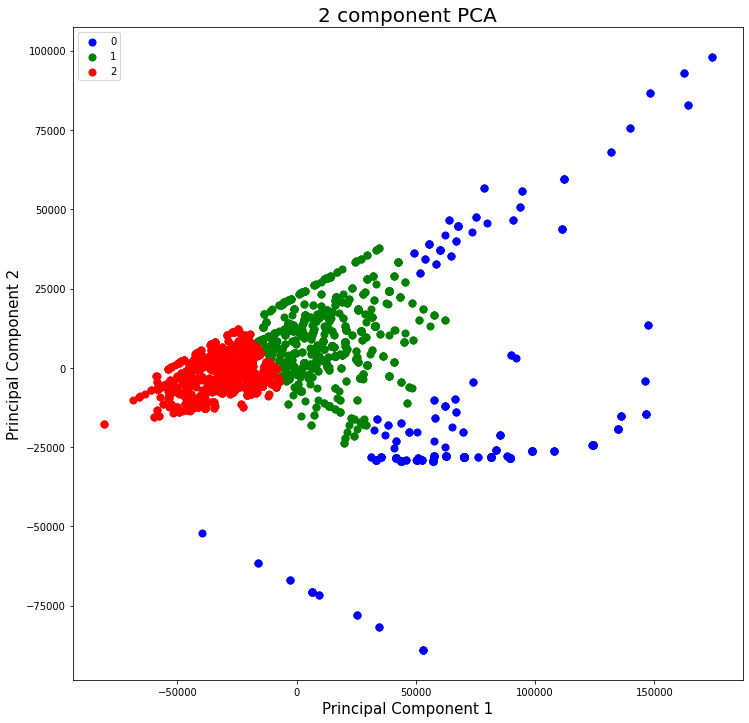

In [ ]:
from sklearn.cluster import Birch
from matplotlib import pyplot

pca = PCA(n_components=2)
# define the model
model = Birch(threshold=0.01, n_clusters=3)
# fit the model
model.fit(clusterDataSetDBSCAN)
# assign a cluster to each example
yhat = model.predict(clusterDataSetDBSCAN)
clusterDataSetDBSCANBirch = clusterDataSetDBSCAN
clusterDataSetDBSCANBirch['Label'] = yhat
clusterDataSetDBSCANBirchx,clusterDataSetDBSCANBirchy = clusterDataSetDBSCANBirch[:-1],clusterDataSetDBSCANBirch.iloc[ :, -1:]
getPCAattr(clusterDataSetDBSCANBirchx,clusterDataSetDBSCANBirchy)

## K-Means Clustering

pcol1         pcol2  Label
0    -39673.976405   3687.258907      1
1    -39673.976405   3687.258907      1
2    -29206.840487  10257.765765      1
3    -29206.840487  10257.765765      1
4    -11840.379015  -8786.326872      1
...            ...           ...    ...
2799  23908.603410 -16118.513710      0
2800 -14756.229351  -2442.530708      1
2801 -14756.229351  -2442.530708      1
2802  -3807.947697  11563.851007      1
2803           NaN           NaN      1

[2804 rows x 3 columns]

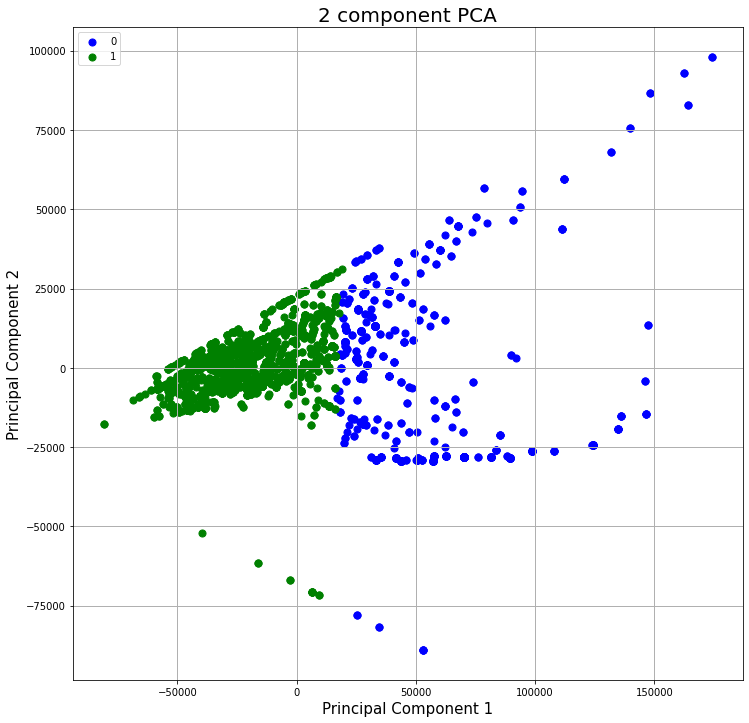

In [ ]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
KMEANLbl = kmeans.fit(clusterDataSetDBSCAN)
lbls = KMEANLbl.fit_predict(clusterDataSetDBSCAN)
clusterDataSetDBSCAN1 = clusterDataSetDBSCAN
clusterDataSetDBSCAN1['Label'] = lbls
clusterDataSetDBSCAN1x,clusterDataSetDBSCAN1y = clusterDataSetDBSCAN1[:-1],clusterDataSetDBSCAN1.iloc[ :, -1:]
getPCAattr(clusterDataSetDBSCAN1x,clusterDataSetDBSCAN1y)

#Thank You.
